In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lets Load Boston House Pricing dataset


In [34]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

In [35]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [36]:
## Lets check the description of the dataset
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [37]:
print(boston.data)


[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [38]:
print(boston.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [39]:
print(boston.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


PREPARING THE DATASET

In [40]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [41]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
dataset['Price']= boston.target  # Adding target variable


In [43]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


SUMMARIZING THE STATS OF DATASET

In [45]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [46]:
## Check the missing Values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [47]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [48]:
import seaborn as sns
sns.pairplot(dataset)

ModuleNotFoundError: No module named 'seaborn'

### Analyzing The Correlated Features

In [ ]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

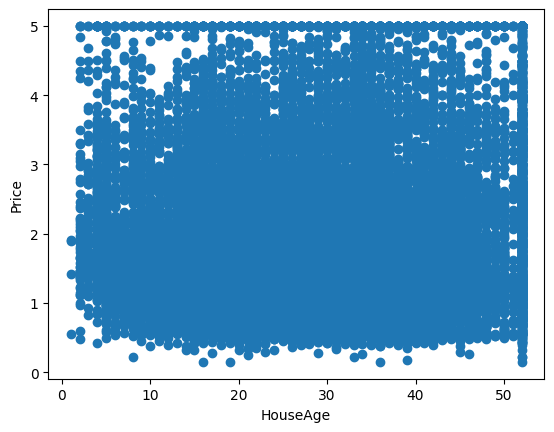

In [ ]:
plt.scatter(dataset['HouseAge'],dataset['Price'])
plt.xlabel("HouseAge")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

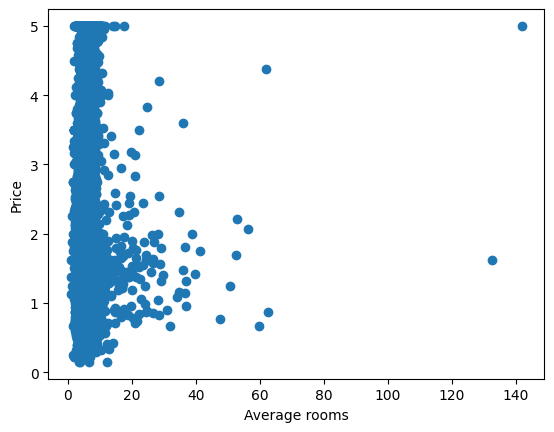

In [ ]:
plt.scatter(dataset['AveRooms'],dataset['Price'])
plt.xlabel("Average rooms")
plt.ylabel("Price")

<Axes: xlabel='AveRooms', ylabel='Price'>

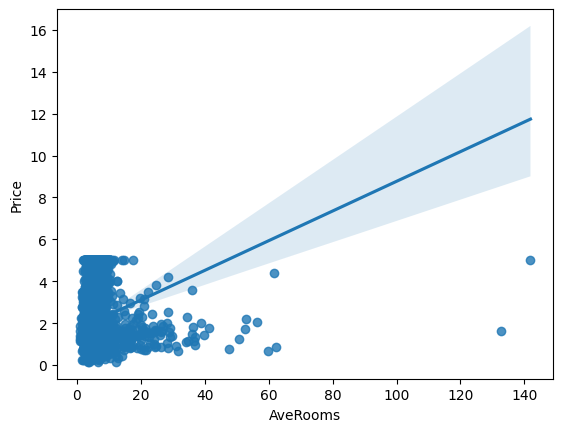

In [ ]:
import seaborn as sns
sns.regplot(x="AveRooms",y="Price",data=dataset)

<Axes: xlabel='Population', ylabel='Price'>

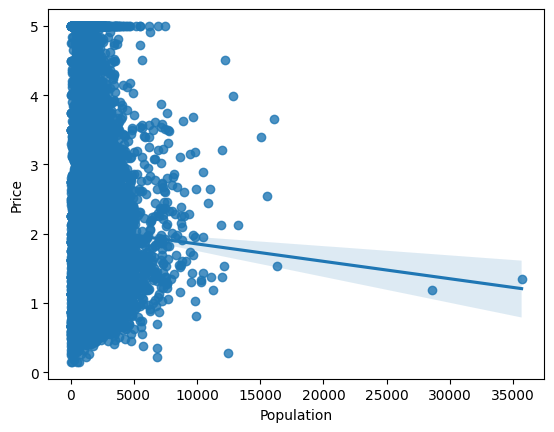

In [ ]:
sns.regplot(x="Population",y="Price",data=dataset)

<Axes: xlabel='AveBedrms', ylabel='Price'>

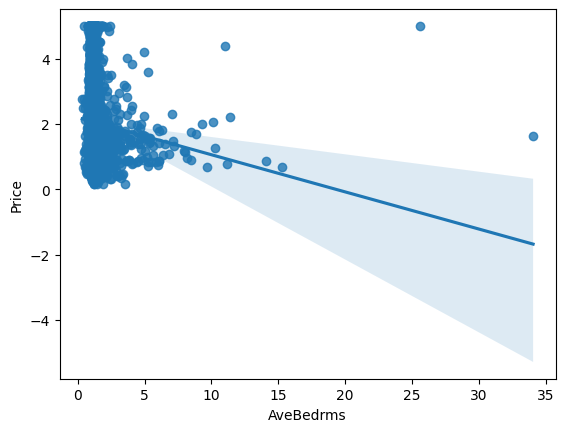

In [ ]:
sns.regplot(x="AveBedrms",y="Price",data=dataset)

In [ ]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [ ]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.3,random_state=42)

In [ ]:
X_train

array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
          33.93      , -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
          32.79      , -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
          34.59      , -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [ ]:
X_test

array([[   1.6812    ,   25.        ,    4.19220056, ...,    3.87743733,
          36.06      , -119.01      ],
       [   2.5313    ,   30.        ,    5.03938356, ...,    2.67979452,
          35.14      , -119.46      ],
       [   3.4801    ,   52.        ,    3.97715472, ...,    1.36033229,
          37.8       , -122.44      ],
       ...,
       [   3.512     ,   16.        ,    3.76228733, ...,    2.36956522,
          33.67      , -117.91      ],
       [   3.65      ,   10.        ,    5.50209205, ...,    3.54751943,
          37.82      , -121.28      ],
       [   3.052     ,   17.        ,    3.35578145, ...,    2.61499365,
          34.15      , -118.24      ]])

In [ ]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [ ]:
X_test

array([[-1.1526893 , -0.28346293, -0.50781822, ...,  0.06127763,
         0.19166399,  0.28664112],
       [-0.70640568,  0.11294728, -0.16252032, ..., -0.03551561,
        -0.23911452,  0.06196251],
       [-0.20830675,  1.85715216, -0.59546738, ..., -0.14215427,
         1.00639726, -1.42590916],
       ...,
       [-0.19155996, -0.99700129, -0.6830438 , ..., -0.06058827,
        -0.92742367,  0.8358555 ],
       [-0.11911302, -1.47269353,  0.02607207, ...,  0.03461374,
         1.01576201, -0.84673764],
       [-0.43304974, -0.91771925, -0.84872893, ..., -0.0407528 ,
        -0.70266966,  0.67109119]])

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
## print the coefficients and the intercept
print(regression.coef_)

print(regression.intercept_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]
2.069239608942295


In [ ]:
## on which parameters the model has been trained
regression.get_params()
{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [ ]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

#### _ASSUMPTIONS_

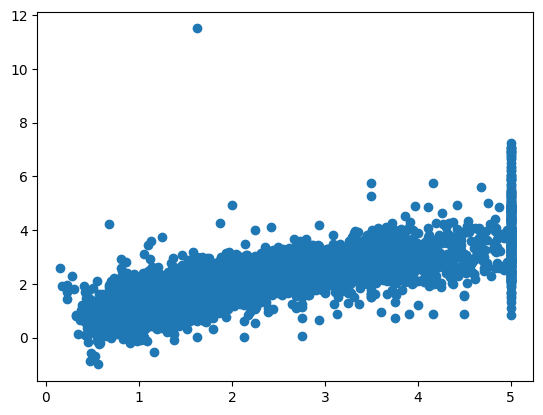

In [ ]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [ ]:
## Residuals
residuals=y_test-reg_pred

residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

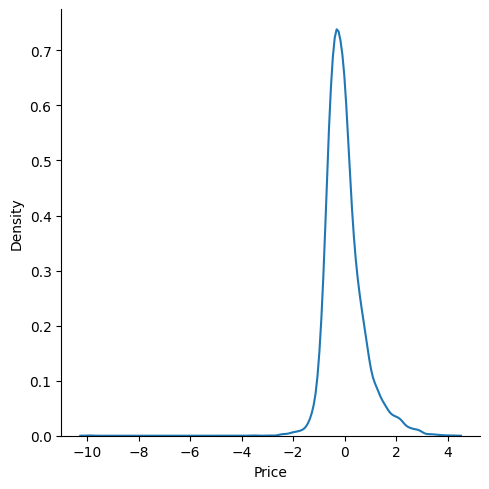

In [ ]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

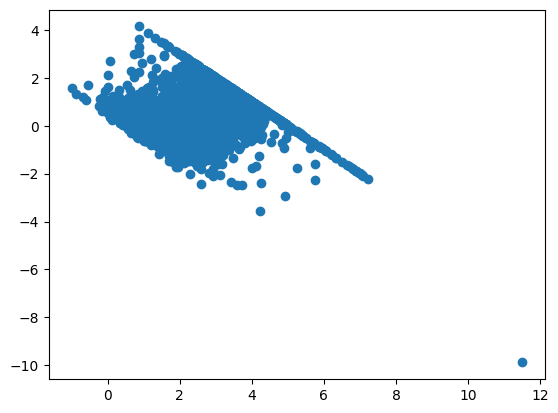

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5272474538305951
0.5305677824766752
0.7284008391515452


### R square and adjusted R square

Formula

__R^2 = 1 - SSR/SST__

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5957702326061665


__Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]__

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5952472117200027

## New Data Prediction

In [ ]:
boston.data[0].reshape(1,-1)



array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [ ]:
##transformation of new data
scaler.transform(boston.data[0].reshape(1,-1))

array([[ 2.33526315,  0.98504972,  0.63012521, -0.16586931, -0.96995366,
        -0.04555657,  1.04385626, -1.32105914]])

In [ ]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([4.14333441])

### Pickling The Model file For Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(regression,open('regmodel.pkl','wb'))  #wb-write byte

In [ ]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))  #rd- read byte

In [ ]:
## Prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([4.14333441])